In [3]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt 
from fiona.crs import from_epsg
import shapely
%matplotlib inline

In [4]:
from geopandas.tools import sjoin

In [5]:
abb = pd.read_csv('unique_listings1516.csv')

In [6]:
abb.head()

,Unnamed: 0,id,latitude,longitude,year,geometry
0,0,1069266.0,40.756852,-73.964754,2015.0,POINT (-73.96475423499014 40.75685194386187)
1,1,1846722.0,40.830599,-73.941014,2015.0,POINT (-73.94101427789765 40.83059906748076)
2,2,2061725.0,40.692189,-73.924120,2015.0,POINT (-73.92412000114966 40.69218932278581)
3,3,44974.0,40.734751,-74.002592,2015.0,POINT (-74.00259246421851 40.73475108783765)
4,4,4701675.0,40.745282,-73.997836,2015.0,POINT (-73.99783627201059 40.74528161142444)


In [7]:
 import shapely
# combine lat and lon to one column
abb['lonlat']=list(zip(abb.longitude,abb.latitude))
# Create Point Geometry for based on lonlat column
abb['geometry']=abb[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
abb.head()

,Unnamed: 0,id,latitude,longitude,year,geometry,lonlat
0,0,1069266.0,40.756852,-73.964754,2015.0,POINT (-73.96475423499014 40.75685194386187),"(-73.964754235, 40.7568519439)"
1,1,1846722.0,40.830599,-73.941014,2015.0,POINT (-73.94101427789765 40.83059906748076),"(-73.9410142779, 40.8305990675)"
2,2,2061725.0,40.692189,-73.924120,2015.0,POINT (-73.92412000114966 40.69218932278581),"(-73.9241200011, 40.6921893228)"
3,3,44974.0,40.734751,-74.002592,2015.0,POINT (-74.00259246421851 40.73475108783765),"(-74.0025924642, 40.7347510878)"
4,4,4701675.0,40.745282,-73.997836,2015.0,POINT (-73.99783627201059 40.74528161142444),"(-73.997836272, 40.7452816114)"


In [8]:
abb = gp.GeoDataFrame(abb, geometry='geometry')

In [9]:
abb.head()

,Unnamed: 0,id,latitude,longitude,year,geometry,lonlat
0,0,1069266.0,40.756852,-73.964754,2015.0,POINT (-73.96475423499014 40.75685194386187),"(-73.964754235, 40.7568519439)"
1,1,1846722.0,40.830599,-73.941014,2015.0,POINT (-73.94101427789765 40.83059906748076),"(-73.9410142779, 40.8305990675)"
2,2,2061725.0,40.692189,-73.924120,2015.0,POINT (-73.92412000114966 40.69218932278581),"(-73.9241200011, 40.6921893228)"
3,3,44974.0,40.734751,-74.002592,2015.0,POINT (-74.00259246421851 40.73475108783765),"(-74.0025924642, 40.7347510878)"
4,4,4701675.0,40.745282,-73.997836,2015.0,POINT (-73.99783627201059 40.74528161142444),"(-73.997836272, 40.7452816114)"


In [10]:
bbl = gp.GeoDataFrame.from_file('drive-download-20171205T204609Z-001/buffer100meters.shp')

In [11]:
bbl.head()

,Borough,ZipCode,BBL,geometry
0,BK,11224,3.070360e+09,"POLYGON ((980829.6322855615 149526.84859999, 9..."
1,BK,11224,3.070370e+09,"POLYGON ((980874.4887737731 149276.5486705538,..."
2,BK,11224,3.086960e+09,"POLYGON ((990221.7646485794 148530.7255509223,..."
3,BK,11224,3.070290e+09,"POLYGON ((983005.4670232051 148690.8695704278,..."
4,BK,11224,3.070490e+09,"POLYGON ((985015.2724194435 148767.2932753136,..."


In [12]:
bbl.crs

{'ellps': 'GRS80',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000.0000000001,
 'y_0': 0}

In [13]:
abb.crs = from_epsg(4326)
bbl.crs

{'ellps': 'GRS80',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000.0000000001,
 'y_0': 0}

In [14]:
abb.crs

{'init': 'epsg:4326', 'no_defs': True}

In [15]:
abb = abb.to_crs(epsg=2263)
bbl = bbl.to_crs(epsg=2263)

In [39]:
merged_100 = sjoin(abb, bbl, how='right',op='within')

In [40]:
merged_100.head()

,index_left,Unnamed: 0,id,latitude,longitude,year,lonlat,Borough,ZipCode,BBL,geometry
index_right,,,,,,,,,,,
3264,3253.0,3253.0,233220.0,40.577293,-73.986708,2015.0,"(-73.9867076635, 40.5772925427)",BK,11224,3.070190e+09,"POLYGON ((988031.9581317678 149602.2543399451,..."
3275,3253.0,3253.0,233220.0,40.577293,-73.986708,2015.0,"(-73.9867076635, 40.5772925427)",BK,11224,3.070190e+09,"POLYGON ((988026.7318087603 149638.2962967966,..."
3282,3253.0,3253.0,233220.0,40.577293,-73.986708,2015.0,"(-73.9867076635, 40.5772925427)",BK,11224,3.070190e+09,"POLYGON ((988034.4646200248 149584.9707685679,..."
3336,3253.0,3253.0,233220.0,40.577293,-73.986708,2015.0,"(-73.9867076635, 40.5772925427)",BK,11224,3.070190e+09,"POLYGON ((988043.7659903382 149520.8281176619,..."
3354,11655.0,11655.0,4738229.0,40.578830,-73.983754,2015.0,"(-73.9837540065, 40.5788295003)",BK,11224,3.070220e+09,"POLYGON ((988810.5055474748 150181.476703846, ..."


In [41]:
merged_100.reset_index(inplace=True)

In [42]:
merged_100.head()

,index_right,index_left,Unnamed: 0,id,latitude,longitude,year,lonlat,Borough,ZipCode,BBL,geometry
0,3264,3253.0,3253.0,233220.0,40.577293,-73.986708,2015.0,"(-73.9867076635, 40.5772925427)",BK,11224,3.070190e+09,"POLYGON ((988031.9581317678 149602.2543399451,..."
1,3275,3253.0,3253.0,233220.0,40.577293,-73.986708,2015.0,"(-73.9867076635, 40.5772925427)",BK,11224,3.070190e+09,"POLYGON ((988026.7318087603 149638.2962967966,..."
2,3282,3253.0,3253.0,233220.0,40.577293,-73.986708,2015.0,"(-73.9867076635, 40.5772925427)",BK,11224,3.070190e+09,"POLYGON ((988034.4646200248 149584.9707685679,..."
3,3336,3253.0,3253.0,233220.0,40.577293,-73.986708,2015.0,"(-73.9867076635, 40.5772925427)",BK,11224,3.070190e+09,"POLYGON ((988043.7659903382 149520.8281176619,..."
4,3354,11655.0,11655.0,4738229.0,40.578830,-73.983754,2015.0,"(-73.9837540065, 40.5788295003)",BK,11224,3.070220e+09,"POLYGON ((988810.5055474748 150181.476703846, ..."


In [45]:
grp_data = merged_100.groupby(merged_100['BBL']).count()

In [47]:
#del merged_100['BBL']
grp_data.reset_index(inplace=True)

In [48]:
grp_data.head()

,BBL,index_right,index_left,Unnamed: 0,id,latitude,longitude,year,lonlat,Borough,ZipCode,geometry
0,1.000010e+09,1,0,0,0,0,0,0,0,1,1,1
1,1.000010e+09,1,0,0,0,0,0,0,0,1,1,1
2,1.000010e+09,1,0,0,0,0,0,0,0,1,1,1
3,1.000020e+09,1,0,0,0,0,0,0,0,1,1,1
4,1.000020e+09,1,0,0,0,0,0,0,0,1,1,1


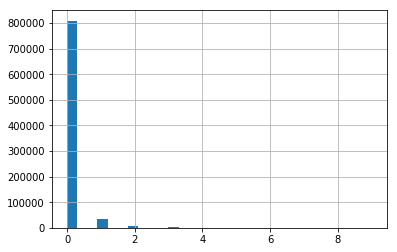

In [57]:
grp_data['id'].hist(bins=30)

(array([  8.09205000e+05,   3.54510000e+04,   8.76400000e+03,
          2.54700000e+03,   8.41000000e+02,   3.22000000e+02,
          8.50000000e+01,   1.60000000e+01,   3.00000000e+00,
          2.00000000e+00]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

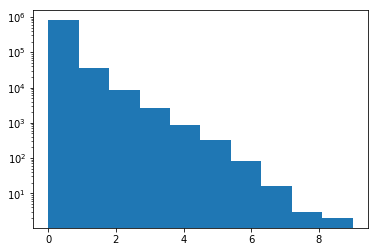

In [60]:
plt.hist(grp_data['id'], log=True)

In [56]:
abb.hist?